In [1]:
import numpy as np
import pandas as pd
import matplotlib
from src.bandit.gaussian_bandit import GaussianBandit
from src.agent.greedy import GreedyAgent
from src.util.stepper import HarmonicStepper

In [2]:
rewards = np.random.normal(0, 1, 10)
rewards

array([ 1.19866645,  0.22886383, -0.06066895,  0.64321059,  1.27755748,
        0.91238325,  0.45426362,  0.96039948, -0.12455589,  0.35053826])

In [3]:
bandit = GaussianBandit(rewards, np.ones(10))

In [34]:
%%time
def run_greedy(run_length, runs, start):
    agent = GreedyAgent(bandit, HarmonicStepper(length=10),  start * np.ones(10))
    tot = pd.DataFrame({'wins': run_length * [0], 'rewards': run_length * [0]})
    for i in range(runs):
        df = agent.run(run_length)
        tot += df
        agent.reset(start * np.ones(10))
    tot /= runs
    return tot

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [ ]:
%%time
greedy_dict = {}
for s in range(5):
    greedy_dict[s] = run_greedy(10000, 2000, s)

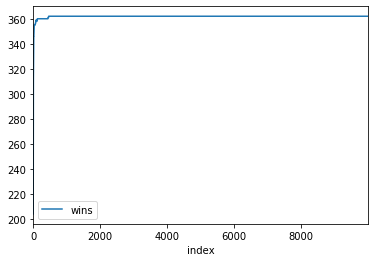

In [32]:
tot.reset_index().plot('index', 'wins')

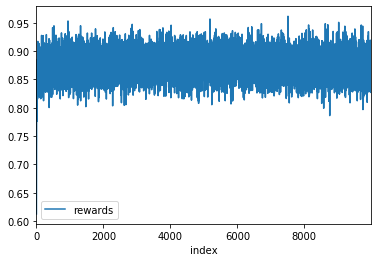

In [33]:
tot.reset_index().plot('index', 'rewards')

In [23]:
agent._q_star

array([ 1.20532111,  1.3284705 ,  1.1882512 , -0.73067721, -0.52770244,
       -2.4883815 , -0.44383358,  0.85902731, -1.92424617,  0.10725872])

In [20]:
bandit._q_values

array([ 0.40210865,  1.30405886,  0.91367113, -0.63602549, -0.31076176,
       -0.86738258,  0.61391908,  0.65528303, -2.09529293, -0.08717314])

In [21]:
df.sum()

wins       1990.000000
rewards    2608.419464
dtype: float64